In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
X_num = pd.read_csv('data_numeric.csv', index_col=0)
X_cat = pd.read_csv('data_categorical.csv', index_col=0)
Y = pd.read_csv('data_targets.csv', index_col=0)

In [6]:
X_num.head()

,AGE,ADT_029,ADTT,TRAFFIC_LANES_ON_028A,MAIN_UNIT_SPANS_045,MAX_SPAN_LEN_MT_048,STRUCTURE_LEN_MT_049,DECK_WIDTH_MT_052,VERT_CLR_UND_054B
ID,,,,,,,,,
10-1003 225,28,6814,34070.0,2,2,28.4,59.2,14.3,0.00
10-1008 221,58,2473,22257.0,2,1,12.5,13.3,9.1,0.00
10-1009 221,179,2029,22319.0,1,3,13.7,43.6,5.2,0.00
10-1020 232,86,3712,22272.0,2,1,7.7,8.4,8.3,0.00
10-1023A231,100,364,4368.0,2,3,7.3,20.4,6.3,6.59


In [7]:
X_cat.head()

,MAINTENANCE_021_1,MAINTENANCE_021_4,MAINTENANCE_021_11,MAINTENANCE_021_32,MAINTENANCE_021_70,OPEN_CLOSED_POSTED_041_A,OPEN_CLOSED_POSTED_041_K,OPEN_CLOSED_POSTED_041_P,STRUCTURE_KIND_043A_0,STRUCTURE_KIND_043A_1,...,MEMBRANE_TYPE_108B_2,MEMBRANE_TYPE_108B_3,MEMBRANE_TYPE_108B_9,MEMBRANE_TYPE_108B_N,DECK_PROTECTION_108C_0,DECK_PROTECTION_108C_1,DECK_PROTECTION_108C_2,DECK_PROTECTION_108C_3,DECK_PROTECTION_108C_9,DECK_PROTECTION_108C_N
ID,,,,,,,,,,,,,,,,,,,,,
10-1003 225,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10-1008 221,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
10-1009 221,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10-1020 232,1,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
10-1023A231,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [8]:
Y.head()

,DECK_COND_058,SUPERSTRUCTURE_COND_059,SUBSTRUCTURE_COND_060
ID,,,
10-1003 225,6,8,6
10-1008 221,7,7,7
10-1009 221,7,5,7
10-1020 232,7,7,5
10-1023A231,7,7,5


## Define target variable

In [16]:
y = Y.iloc[:, 0]

# Preprocessing

## EDA

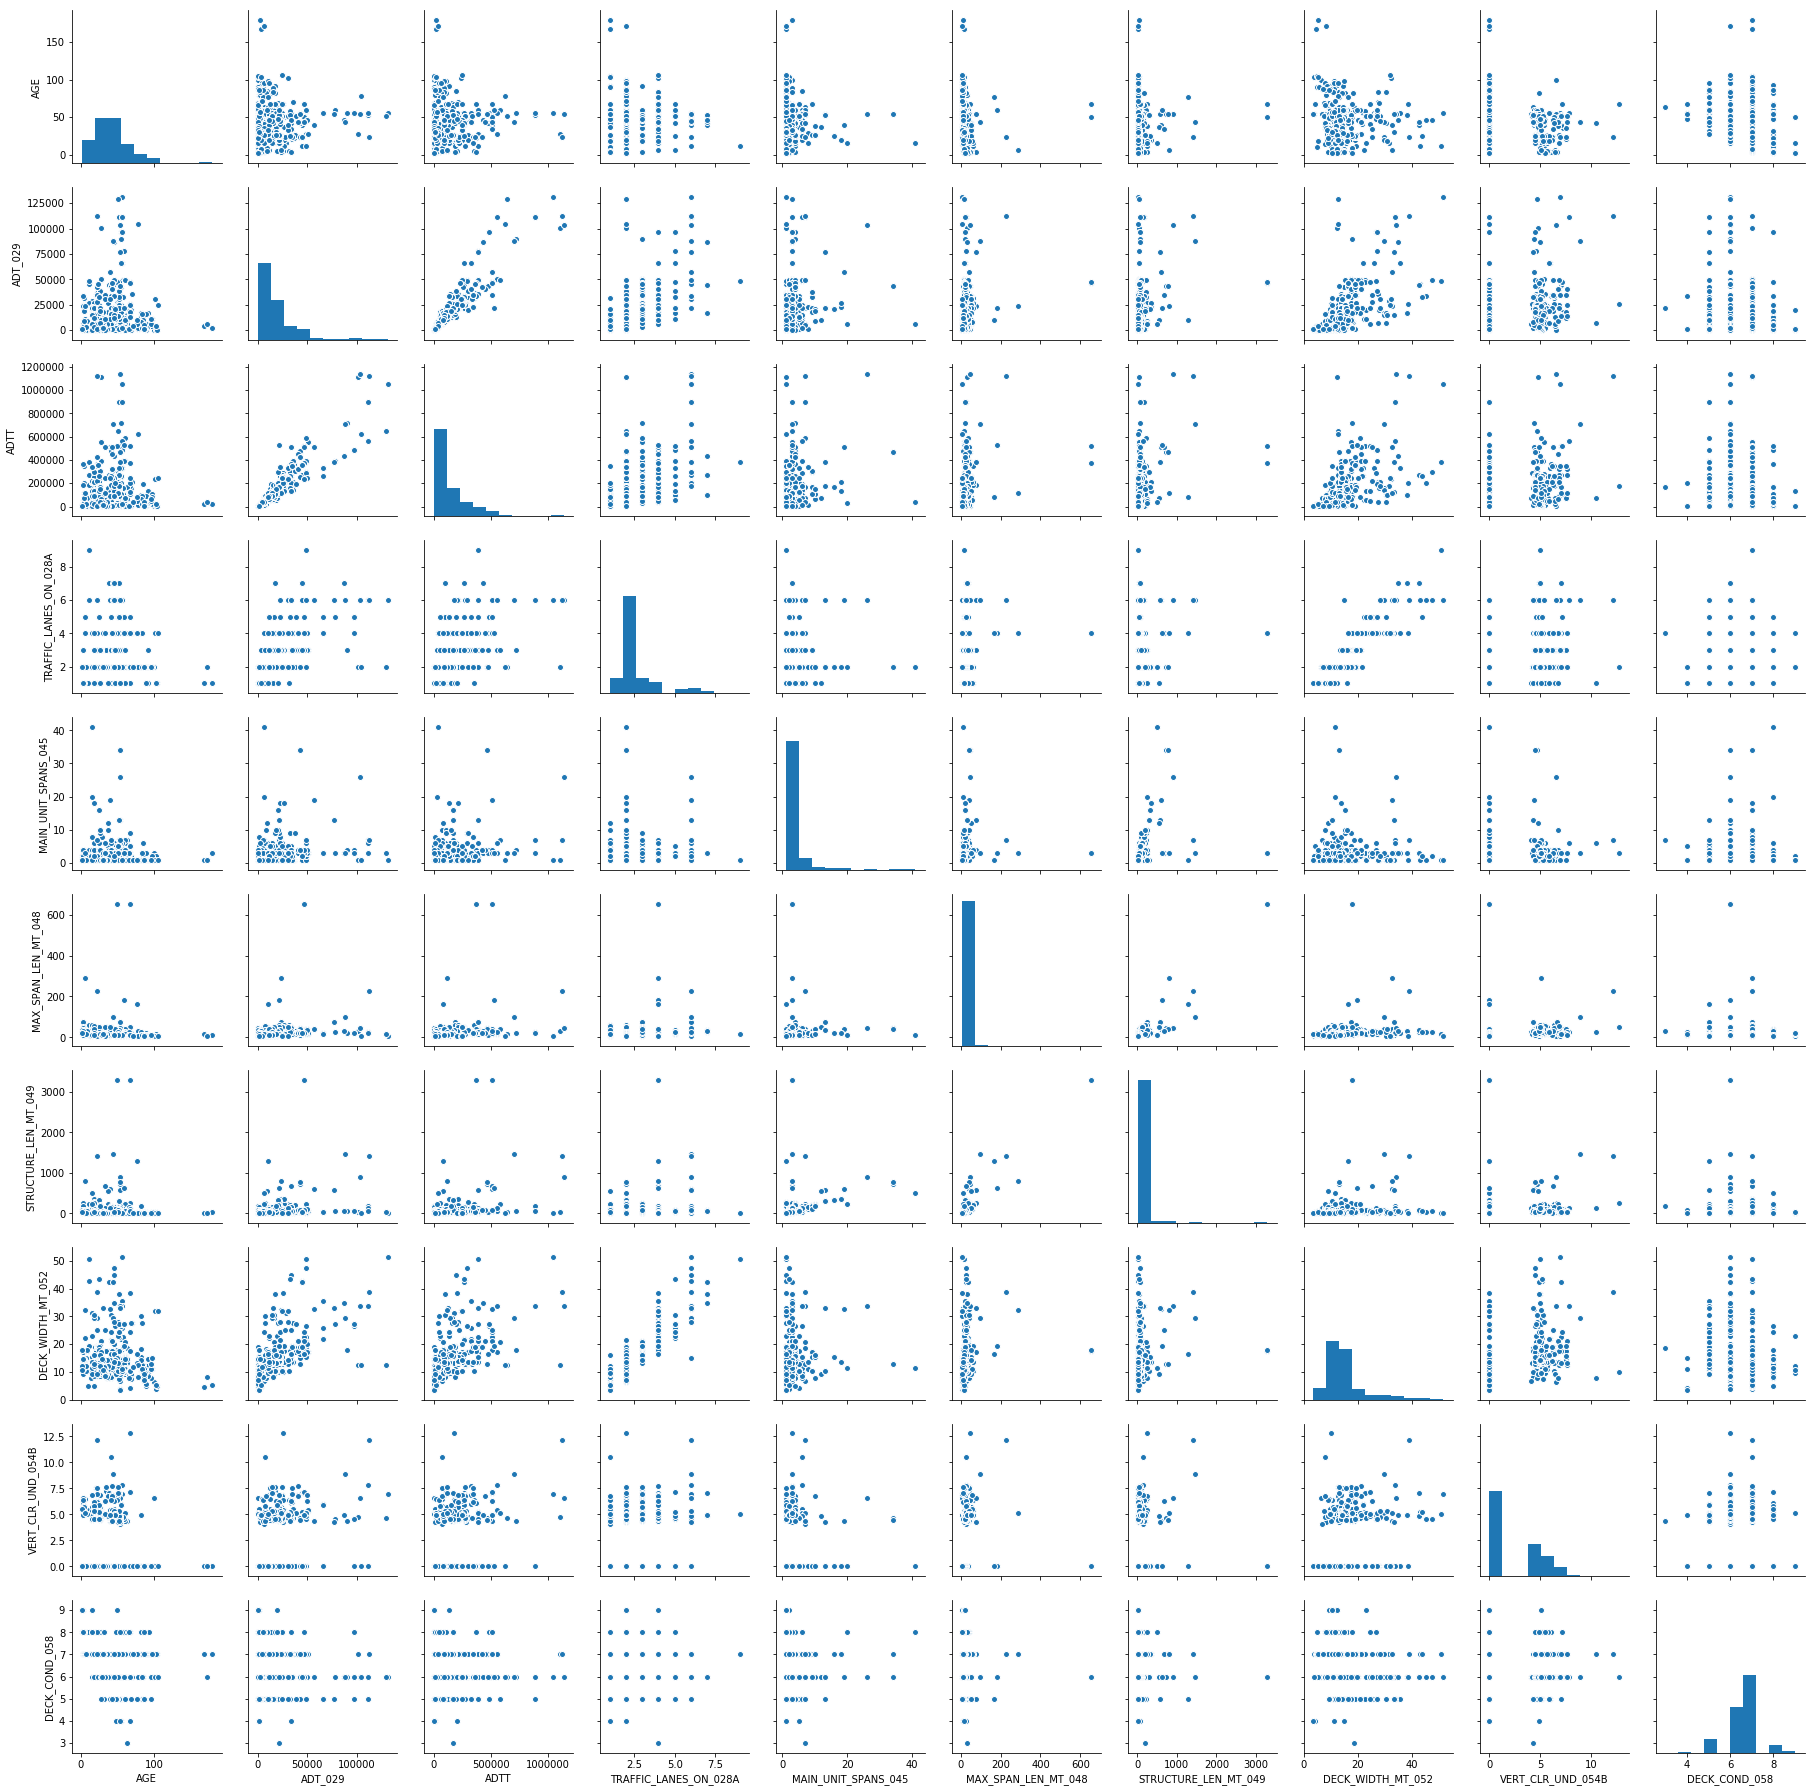

In [12]:
sns.pairplot(pd.concat([X_num, y], axis=1));

## Scale numericals

In [14]:
from sklearn import preprocessing

In [25]:
scaler = preprocessing.StandardScaler()
X_num_scaled = scaler.fit_transform(X_num)
X_num_scaled = pd.DataFrame(X_num_scaled, index=X_num.index, columns=X_num.columns)

## Normalize

In [ ]:
# may need to nomalize data

# Model

## Define features

In [27]:
X = X_num_scaled.join(X_cat)

In [28]:
X.head()

,AGE,ADT_029,ADTT,TRAFFIC_LANES_ON_028A,MAIN_UNIT_SPANS_045,MAX_SPAN_LEN_MT_048,STRUCTURE_LEN_MT_049,DECK_WIDTH_MT_052,VERT_CLR_UND_054B,MAINTENANCE_021_1,...,MEMBRANE_TYPE_108B_2,MEMBRANE_TYPE_108B_3,MEMBRANE_TYPE_108B_9,MEMBRANE_TYPE_108B_N,DECK_PROTECTION_108C_0,DECK_PROTECTION_108C_1,DECK_PROTECTION_108C_2,DECK_PROTECTION_108C_3,DECK_PROTECTION_108C_9,DECK_PROTECTION_108C_N
ID,,,,,,,,,,,,,,,,,,,,,
10-1003 225,-0.587834,-0.526942,-0.628431,-0.356568,-0.249323,0.042908,-0.133543,-0.104164,-0.831481,1,...,0,0,0,0,0,1,0,0,0,0
10-1008 221,0.614907,-0.725377,-0.695662,-0.356568,-0.504687,-0.294759,-0.310809,-0.811661,-0.831481,1,...,0,0,0,0,1,0,0,0,0,0
10-1009 221,5.465961,-0.745673,-0.695309,-1.189754,0.006041,-0.269275,-0.193790,-1.342284,-0.831481,1,...,0,0,0,0,0,0,0,0,0,1
10-1020 232,1.737465,-0.668740,-0.695576,-0.356568,-0.504687,-0.396697,-0.329733,-0.920507,-0.831481,1,...,0,0,0,0,0,1,0,0,0,0
10-1023A231,2.298744,-0.821783,-0.797472,-0.356568,0.006041,-0.405191,-0.283389,-1.192622,1.508491,1,...,0,0,0,0,1,0,0,0,0,0


## Test/train split

In [ ]:
# split data into test/train


In [ ]:
# shuffle data to randomize for modeling


## Linear Regression Modeling

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
model = LinearRegression()

In [ ]:
model.fit(X_scaled, y)